# **Projeto :**  Análise de Servidores Brasileiros com a metríca MTBF (Mean Time Between Failures)

#### **Instalação das dependências**

In [27]:
#! pip install matplotlib
#! pip install seaborn
#! pip install scipy

#### **Importação dos Módulos**

In [28]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#### **Leitura dos Dados**

In [29]:
data_file = "modules\MBTF_data.txt"
data_set = open(data_file, 'r')

data = []
for linha in data_set:
   data.append(float(linha.replace(',', '.')))

### **Análise Descritiva**

#### **Medidas de Centralidade dos Dados**

In [30]:
import statistics
media = statistics.mean(data)
mediana = statistics.median(data)
moda = statistics.mode(data)
desvioPadrao = statistics.stdev(data)
variancia = statistics.variance(data)

print(f"Média:  {media:.4f}")
print(f"Mediana:  {mediana:.2f}")
print(f"Moda:  {moda:.2f}")
print(f"Desvio Padrão:  {desvioPadrao:.4f}")
print(f"Variância:  {variancia:.4f}")

Média:  23132.1581
Mediana:  23193.60
Moda:  25896.50
Desvio Padrão:  3243.9419
Variância:  10523159.1365


### **Teste de Hipótese - Não é uma distribuição Normal**

#### **Teste Q-Q**


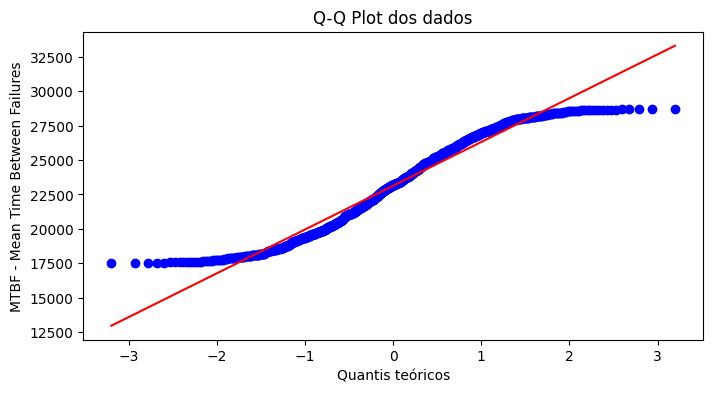

In [31]:
from scipy.stats import probplot

fig, ax = plt.subplots(figsize=(8, 4))
probplot(data, plot=ax)

# Definir título e rótulos dos eixos
ax.set_title("Q-Q Plot dos dados")
ax.set_xlabel("Quantis teóricos")
ax.set_ylabel("MTBF - Mean Time Between Failures")

plt.show()

#### **Teste de Normalidade de Anderson Darling** - *Scipy*

In [32]:
# Teste de normalidade com o teste de Anderson-Darling
stats, critical, teoric = stats.anderson(data, dist='norm')

# Compara o valor de estatística crítico e o 
for i in range(len(teoric)):
    if stats < critical[i]:
        print(f'Com {str(100 - teoric[i])}% de confiança, os dados são similares a uma distribuição normal segundo o teste de Anderson Darling')
    else:
        print(f'Com {str(100 - teoric[i])}% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Anderson Darling')

Com 85.0% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Anderson Darling
Com 90.0% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Anderson Darling
Com 95.0% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Anderson Darling
Com 97.5% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Anderson Darling
Com 99.0% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Anderson Darling


#### **Histograma de Distribuição de Frequência**

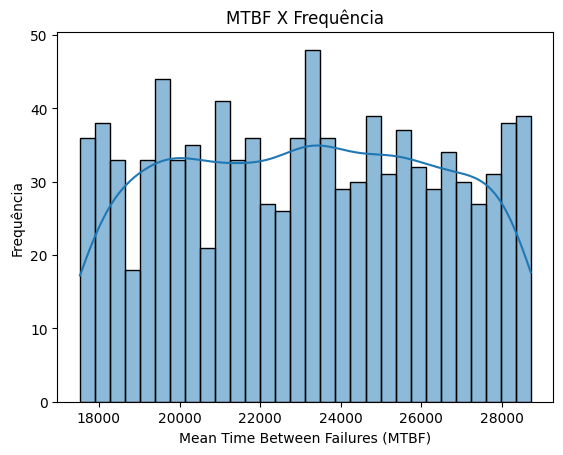

In [33]:
ax = sns.histplot(data, kde=True, bins=30)

# Definindo o título e rótulos dos eixos
ax.set(title="MTBF X Frequência", xlabel="Mean Time Between Failures (MTBF)", ylabel="Frequência")

plt.show()